# The English Premier League: Survival of the Strongest

The English Premier League is a major soccer league in England. It is regarded as the best league in the world due to its intensity, popularity and talented players. In this report, a dataset from 2006 to 2018 was studied. In the major league, the team that accumulates the most points win the title after 38 matches have been played. Every year the three bottom teams are demoted and the top 3 teams from the division 2 english league are promoted to replace them. Some certain teams are known to never progress up the rankings of the premier league and find themselves closer to getting relegated than challenging for the title or at least finish in the top half of the table to try to get closer next year. Why do the best teams keep being the best? What can the bottoms teams do better to get them progressing towards success? This report will answer both of those questions.

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import os
os.chdir('/users/tofaj/Downloads')

In [2]:
infile1 = 'Premier_league_python_project_stats.csv' #csv with table standings and team statistics
infile2 = 'Premier_league_python_project_results.csv' #csv with fixture results from each matchdays 

For this project, two datasets were collected. One is the results of the fixtures within those years and the other is the final table standing and team statistics throughout those years.

In [3]:
def head(x):
    return x.head() # function return the head of a x

In [4]:
def get_data2(x):
    prem_results = pd.read_csv(x)
    a = prem_results = pd.DataFrame(prem_results) #function to convert x into a dataframe. this is meant for the results data
    return a

In [5]:
def get_data1(x):
    prem_stats = pd.read_csv(x)
    b = prem_stats = pd.DataFrame(prem_stats) #function to convert x into a dataframe. this is meant for the stats data
    return b

In [6]:
prem_stats = get_data1(infile1)
prem_stats

team  wins  losses  goals  total_yel_card  \
0       Manchester United    28       5     83              60   
1                 Chelsea    24       3     64              62   
2               Liverpool    20      10     57              44   
3                 Arsenal    19       8     63              59   
4       Tottenham Hotspur    17      12     57              48   
..                    ...   ...     ...    ...             ...   
235     Huddersfield Town     9      19     28              62   
236          Swansea City     8      21     28              51   
237           Southampton     7      16     37              63   
238            Stoke City     7      19     35              62   
239  West Bromwich Albion     6      19     31              73   

     total_red_card  total_scoring_att  ontarget_scoring_att  hit_woodwork  \
0                 1                698                   256            21   
1                 4                636                   216            14   
2                 0                668                   214            15   
3                 3                638                   226            19   
4                 3                520                   184             6   
..              ...                ...                   ...           ...   
235               3                362                   109             8   
236               1                338                   103             8   
237               2                450                   145            15   
238               1                384                   132             8   
239               1                378                   114             7   

     att_hd_goal  ...  total_cross  corner_taken  touches  big_chance_missed  \
0             12  ...          918           258    25686                NaN   
1             16  ...          897           231    24010                NaN   
2              8  ...         1107           282    24150                NaN   
3             10  ...          873           278    25592                NaN   
4              5  ...          796           181    22200                NaN   
..           ...  ...          ...           ...      ...                ...   
235            5  ...          765           165    22619               21.0   
236            3  ...          694           150    22775               26.0   
237            7  ...          800           227    24639               37.0   
238            8  ...          598           136    20368               33.0   
239           10  ...          784           176    20552               28.0   

     clearance_off_line  dispossessed  penalty_save  total_high_claim  \
0                     1           NaN             2                37   
1                     2           NaN             1                74   
2                     1           NaN             0                51   
3                     1           NaN             0                88   
4                     2           NaN             0                51   
..                  ...           ...           ...               ...   
235                   6         416.0             2                31   
236                   1         439.0             3                44   
237                   4         379.0             1                29   
238                   3         402.0             0                27   
239                   3         446.0             0                40   

     punches     season  
0         25  2006-2007  
1         22  2006-2007  
2         27  2006-2007  
3         27  2006-2007  
4         24  2006-2007  
..       ...        ...  
235       24  2017-2018  
236       15  2017-2018  
237       13  2017-2018  
238       14  2017-2018  
239        5  2017-2018  

[240 rows x 42 columns]

The code below displays the data for the premier league standings from season to season. There are 42 columns and 240 rows of data. Important statistics would be analyzed for each team such as wins, goals, losses and other stats that will help answer the questions. 

In [7]:
prem_results = get_data2(infile2)
prem_results

home_team         away_team  home_goals  away_goals result  \
0      Sheffield United         Liverpool           1           1      D   
1               Arsenal       Aston Villa           1           1      D   
2               Everton           Watford           2           1      H   
3      Newcastle United    Wigan Athletic           2           1      H   
4            Portsmouth  Blackburn Rovers           3           0      H   
...                 ...               ...         ...         ...    ...   
4555   Newcastle United           Chelsea           3           0      H   
4556        Southampton   Manchester City           0           1      A   
4557       Swansea City        Stoke City           1           2      A   
4558  Tottenham Hotspur    Leicester City           5           4      H   
4559    West Ham United           Everton           3           1      H   

         season  
0     2006-2007  
1     2006-2007  
2     2006-2007  
3     2006-2007  
4     2006-2007  
...         ...  
4555  2017-2018  
4556  2017-2018  
4557  2017-2018  
4558  2017-2018  
4559  2017-2018  

[4560 rows x 6 columns]

This code returns the premier league fixture results. These are the full time scores of the matchday results. The home team are the team that played at home that day so they had what the commentators call home advantage. The columns for this dataset include how many goals each team scored and the results. Result D is displayed when there is a draw, H when the home team wins and A when the away team wins. There are 4560 rows and 6 columns.

In [8]:
prem_stats = prem_stats.drop('big_chance_missed', axis =1) #Drop column. axis is 1 when dropping a column, 0 for row
prem_stats = prem_stats.drop('dispossessed', axis =1)
prem_stats = prem_stats.drop('backward_pass', axis=1)
prem_stats = prem_stats.drop('total_through_ball', axis =1)
head(prem_stats)

team  wins  losses  goals  total_yel_card  total_red_card  \
0  Manchester United    28       5     83              60               1   
1            Chelsea    24       3     64              62               4   
2          Liverpool    20      10     57              44               0   
3            Arsenal    19       8     63              59               3   
4  Tottenham Hotspur    17      12     57              48               3   

   total_scoring_att  ontarget_scoring_att  hit_woodwork  att_hd_goal  ...  \
0                698                   256            21           12  ...   
1                636                   216            14           16  ...   
2                668                   214            15            8  ...   
3                638                   226            19           10  ...   
4                520                   184             6            5  ...   

   total_pass  total_long_balls  total_cross  corner_taken  touches  \
0       18723              2397          918           258    25686   
1       16759              2270          897           231    24010   
2       17154              2800         1107           282    24150   
3       18458              2045          873           278    25592   
4       14914              2408          796           181    22200   

   clearance_off_line  penalty_save  total_high_claim  punches     season  
0                   1             2                37       25  2006-2007  
1                   2             1                74       22  2006-2007  
2                   1             0                51       27  2006-2007  
3                   1             0                88       27  2006-2007  
4                   2             0                51       24  2006-2007  

[5 rows x 38 columns]

These columns above were dropped because they had null values indicated with 'NAN'

In [9]:
prem_stats.rename(columns = {'clearance_off_line': 'clearances','ontarget_scoring_att':'shots_on_target','total_scoring_att':'total_shots'}, inplace=True)
prem_stats.columns #rename columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_shots', 'shots_on_target', 'hit_woodwork', 'att_hd_goal',
       'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal', 'att_obox_goal',
       'goal_fastbreak', 'total_offside', 'clean_sheet', 'goals_conceded',
       'saves', 'outfielder_block', 'interception', 'total_tackle',
       'last_man_tackle', 'total_clearance', 'head_clearance', 'own_goals',
       'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_long_balls', 'total_cross', 'corner_taken', 'touches',
       'clearances', 'penalty_save', 'total_high_claim', 'punches', 'season'],
      dtype='object')

These columns were renamed because the original names weren't as clear. Since this dataset was taken from Kaggle, there were descriptions for each column and so they were changed according to what they are supposed to describe.

In [10]:
head(prem_stats) 

team  wins  losses  goals  total_yel_card  total_red_card  \
0  Manchester United    28       5     83              60               1   
1            Chelsea    24       3     64              62               4   
2          Liverpool    20      10     57              44               0   
3            Arsenal    19       8     63              59               3   
4  Tottenham Hotspur    17      12     57              48               3   

   total_shots  shots_on_target  hit_woodwork  att_hd_goal  ...  total_pass  \
0          698              256            21           12  ...       18723   
1          636              216            14           16  ...       16759   
2          668              214            15            8  ...       17154   
3          638              226            19           10  ...       18458   
4          520              184             6            5  ...       14914   

   total_long_balls  total_cross  corner_taken  touches  clearances  \
0              2397          918           258    25686           1   
1              2270          897           231    24010           2   
2              2800         1107           282    24150           1   
3              2045          873           278    25592           1   
4              2408          796           181    22200           2   

   penalty_save  total_high_claim  punches     season  
0             2                37       25  2006-2007  
1             1                74       22  2006-2007  
2             0                51       27  2006-2007  
3             0                88       27  2006-2007  
4             0                51       24  2006-2007  

[5 rows x 38 columns]

In [11]:
prem_stats.head()
pd.set_option('display.max_rows', None) #display the total number of rows in the dataset
print(prem_stats)

                         team  wins  losses  goals  total_yel_card  \
0           Manchester United    28       5     83              60   
1                     Chelsea    24       3     64              62   
2                   Liverpool    20      10     57              44   
3                     Arsenal    19       8     63              59   
4           Tottenham Hotspur    17      12     57              48   
5            Bolton Wanderers    16      14     47              84   
6                     Reading    16      15     52              38   
7            Blackburn Rovers    15      16     52              77   
8                     Everton    15      10     52              65   
9                  Portsmouth    14      12     45              48   
10              Middlesbrough    12      16     44              64   
11            West Ham United    12      21     35              85   
12                Aston Villa    11      10     43              48   
13            Manche

In [12]:
stats_longdf = (prem_stats.melt(id_vars = ['team','season'],
               var_name = 'stats',
               value_name = 'wins'))
stats_longdf.head(240) #put all 240 of the rows into a longstack inspecting the team, the respective season and the wins

C:\Users\tofaj\AppData\Local\Temp\ipykernel_23388\3924982744.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  stats_longdf = (prem_stats.melt(id_vars = ['team','season'],


team     season stats  wins
0           Manchester United  2006-2007  wins  28.0
1                     Chelsea  2006-2007  wins  24.0
2                   Liverpool  2006-2007  wins  20.0
3                     Arsenal  2006-2007  wins  19.0
4           Tottenham Hotspur  2006-2007  wins  17.0
5            Bolton Wanderers  2006-2007  wins  16.0
6                     Reading  2006-2007  wins  16.0
7            Blackburn Rovers  2006-2007  wins  15.0
8                     Everton  2006-2007  wins  15.0
9                  Portsmouth  2006-2007  wins  14.0
10              Middlesbrough  2006-2007  wins  12.0
11            West Ham United  2006-2007  wins  12.0
12                Aston Villa  2006-2007  wins  11.0
13            Manchester City  2006-2007  wins  11.0
14           Newcastle United  2006-2007  wins  11.0
15           Sheffield United  2006-2007  wins  10.0
16             Wigan Athletic  2006-2007  wins  10.0
17          Charlton Athletic  2006-2007  wins   8.0
18                     Fulham  2006-2007  wins   8.0
19                    Watford  2006-2007  wins   5.0
20          Manchester United  2007-2008  wins  27.0
21                    Chelsea  2007-2008  wins  25.0
22                    Arsenal  2007-2008  wins  24.0
23                  Liverpool  2007-2008  wins  21.0
24                    Everton  2007-2008  wins  19.0
25                Aston Villa  2007-2008  wins  16.0
26                 Portsmouth  2007-2008  wins  16.0
27           Blackburn Rovers  2007-2008  wins  15.0
28            Manchester City  2007-2008  wins  15.0
29            West Ham United  2007-2008  wins  13.0
30           Newcastle United  2007-2008  wins  11.0
31                 Sunderland  2007-2008  wins  11.0
32          Tottenham Hotspur  2007-2008  wins  11.0
33              Middlesbrough  2007-2008  wins  10.0
34                    Reading  2007-2008  wins  10.0
35             Wigan Athletic  2007-2008  wins  10.0
36           Bolton Wanderers  2007-2008  wins   9.0
37            Birmingham City  2007-2008  wins   8.0
38                     Fulham  2007-2008  wins   8.0
39               Derby County  2007-2008  wins   1.0
40          Manchester United  2008-2009  wins  28.0
41                    Chelsea  2008-2009  wins  25.0
42                  Liverpool  2008-2009  wins  25.0
43                    Arsenal  2008-2009  wins  20.0
44                Aston Villa  2008-2009  wins  17.0
45                    Everton  2008-2009  wins  17.0
46            Manchester City  2008-2009  wins  15.0
47                     Fulham  2008-2009  wins  14.0
48          Tottenham Hotspur  2008-2009  wins  14.0
49            West Ham United  2008-2009  wins  14.0
50                 Stoke City  2008-2009  wins  12.0
51             Wigan Athletic  2008-2009  wins  12.0
52           Bolton Wanderers  2008-2009  wins  11.0
53           Blackburn Rovers  2008-2009  wins  10.0
54                 Portsmouth  2008-2009  wins  10.0
55                 Sunderland  2008-2009  wins   9.0
56                  Hull City  2008-2009  wins   8.0
57       West Bromwich Albion  2008-2009  wins   8.0
58              Middlesbrough  2008-2009  wins   7.0
59           Newcastle United  2008-2009  wins   7.0
60                    Chelsea  2009-2010  wins  27.0
61          Manchester United  2009-2010  wins  27.0
62                    Arsenal  2009-2010  wins  23.0
63          Tottenham Hotspur  2009-2010  wins  21.0
64                  Liverpool  2009-2010  wins  18.0
65            Manchester City  2009-2010  wins  18.0
66                Aston Villa  2009-2010  wins  17.0
67                    Everton  2009-2010  wins  16.0
68            Birmingham City  2009-2010  wins  13.0
69           Blackburn Rovers  2009-2010  wins  13.0
70                     Fulham  2009-2010  wins  12.0
71                 Stoke City  2009-2010  wins  11.0
72                 Sunderland  2009-2010  wins  11.0
73           Bolton Wanderers  2009-2010  wins  10.0
74             Wigan Athletic  2009-2010  wins   9

In [13]:
def wins(x):
    wins = x.groupby(['team'])['wins'].agg(['mean','min','median','max','std']) 
    a = wins.sort_values(by='mean', ascending=False) #group results in descending order
    return a
#return the mean, min, median, max and std of team wins

In [14]:
def goals(x):
    goals = x.groupby(['team'])['goals'].agg(['mean','min','median','max','std']) 
    a = goals.sort_values(by='mean', ascending=False) #group results in descending order
    return a
#return the mean, min, median, max and std of team goals.

In [15]:
def total_shots(x):
    shots = x.groupby(['team'])['total_shots'].agg(['mean','min','median','max','std']) 
    a = shots.sort_values(by='mean', ascending=False)
    return a
#return the mean, min, median, max and std of total shots for each team. group in a descending order

In [16]:
def target_shots(x):
    shots = x.groupby(['team'])['shots_on_target'].agg(['mean','min','median','max','std'])
    a = shots.sort_values(by='mean', ascending=False)
    return a
#return the mean, min, median, max and std of shots on target for each team. group in a descending order

In [17]:
def losses(x):
    losses = prem_stats.groupby(['team'])['losses'].agg(['mean','min','median','max','std'])    
    a = losses.sort_values(by='mean', ascending=False)
    return a
#return the mean, min, median, max and std of losses for each team. group in a descending order

In [18]:
def total_passes(x):
    passes = prem_stats.groupby(['team'])['total_pass'].agg(['mean','min','median','max','std'])
    a = passes.sort_values(by='mean',ascending=False)
    return a
#return the mean, min, median, max and std of total passes for each team. group in a descending order

In [19]:
def szngoals(x):
    seasongoals = prem_stats.groupby(['season'])['goals'].agg(['mean','min','median','max','std'])
    a = seasongoals.sort_values(by='mean', ascending=False)
    return a
#return the mean, min, median, max and std of total goals for each season. group in a descending order

In [20]:
def home_goals(x):
    a = prem_results.groupby(['home_team', 'season'], as_index=False)['home_goals'].sum()
    b = a.sort_values(by='home_goals', ascending=False) 
    return b
#return the sum of home goals scored by home teams for each season. group in a descending order

In [21]:
def away_goals(x):
    a = prem_results.groupby(['away_team', 'season'], as_index=False)['away_goals'].sum()
    b = a.sort_values(by='away_goals', ascending=False) 
    return b
#return the sum of away goals scored by away teams for each season. group in a descending order

In [22]:
wins(prem_stats)

mean  min  median  max       std
team                                                           
Manchester United         24.166667   18    26.0   28  4.108380
Chelsea                   23.000000   12    24.5   30  4.690416
Manchester City           21.333333   11    22.0   32  6.080271
Arsenal                   21.250000   19    21.0   24  1.912875
Liverpool                 19.500000   14    19.0   26  3.680415
Tottenham Hotspur         19.000000   11    19.5   26  4.045199
Everton                   15.416667   11    15.5   21  2.906367
Leicester City            14.500000   11    12.0   23  5.686241
Southampton               13.166667    7    13.5   18  4.622409
Blackburn Rovers          12.000000    8    12.0   15  2.828427
Crystal Palace            12.000000   11    12.0   13  1.000000
Portsmouth                11.750000    7    12.0   16  4.031129
Swansea City              11.714286    8    12.0   16  2.360387
Stoke City                11.600000    7    11.5   15  2.366432
Newcastle United          11.600000    7    11.0   19  3.306559
West Ham United           11.545455    7    12.0   16  2.544156
AFC Bournemouth           11.333333   11    11.0   12  0.577350
Bolton Wanderers          11.333333    9    10.5   16  2.503331
Aston Villa               11.300000    3    10.5   17  4.473378
Fulham                    10.875000    8    11.0   14  2.416461
Reading                   10.666667    6    10.0   16  5.033223
West Bromwich Albion      10.333333    6    11.0   14  2.783882
Sheffield United          10.000000   10    10.0   10       NaN
Wigan Athletic            10.000000    9    10.0   12  1.154701
Burnley                   10.000000    7     9.5   14  3.162278
Blackpool                 10.000000   10    10.0   10       NaN
Norwich City               9.750000    8     9.5   12  1.707825
Watford                    9.750000    5    11.0   12  3.201562
Birmingham City            9.666667    8     8.0   13  2.886751
Sunderland                 9.500000    6     9.5   12  1.900292
Huddersfield Town          9.000000    9     9.0    9       NaN
Brighton and Hove Albion   9.000000    9     9.0    9       NaN
Middlesbrough              8.500000    5     8.5   12  3.109126
Wolverhampton Wanderers    8.333333    5     9.0   11  3.055050
Hull City                  8.200000    6     8.0   10  1.483240
Charlton Athletic          8.000000    8     8.0    8       NaN
Queens Park Rangers        7.333333    4     8.0   10  3.055050
Cardiff City               7.000000    7     7.0    7       NaN
Derby County               1.000000    1     1.0    1       NaN

This displays descriptive statistics for wins amongst each team on average for all the seasons. On average Manchester United won the most with 24 wins across all seasons. Chelsea, Manchester City and Arsenal also had above 21 wins on average from year 2006 to 2018. Looking at the bottom, Derby County had an average of 1 win which is really low. This suggest that Derby County have never stayed in the premier league for more than a season. 

Other teams like Cardiff, Queens Park Rangers, Charlton Atheltic, Hull City and Middlesbrough have average wins between 7 and 8.5 which would suggest that based on their wins they are always battling in relegation spot. Each win gives you 3 points towards the team's points tally and so each of these bottom teams average about 21 to 26 points based on their wins. On the other hand, Manchester United average 72 points across all seasons which suggest that the gap is really wide between top of the table and bottom. 

The analysis would suggest that if a team wants to enter top 4, they would need to shoot for an average of 21 wins a season and as a result the target for point tally should be 63. As seen in the code output, a large number of teams are far behind.



In [23]:
wins_viz = wins(prem_stats)
wins_viz.head()

mean  min  median  max       std
team                                                    
Manchester United  24.166667   18    26.0   28  4.108380
Chelsea            23.000000   12    24.5   30  4.690416
Manchester City    21.333333   11    22.0   32  6.080271
Arsenal            21.250000   19    21.0   24  1.912875
Liverpool          19.500000   14    19.0   26  3.680415

In [24]:
#Functions to return color gradients for plots
def hex_to_RGB(hex_str):
    #FFFFFF -> [255,255,255]
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_gradient(c1, c2, n):
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


In [25]:
#options for plot styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\Users\tofaj\AppData\Local\Temp\ipykernel_23388\3308400203.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


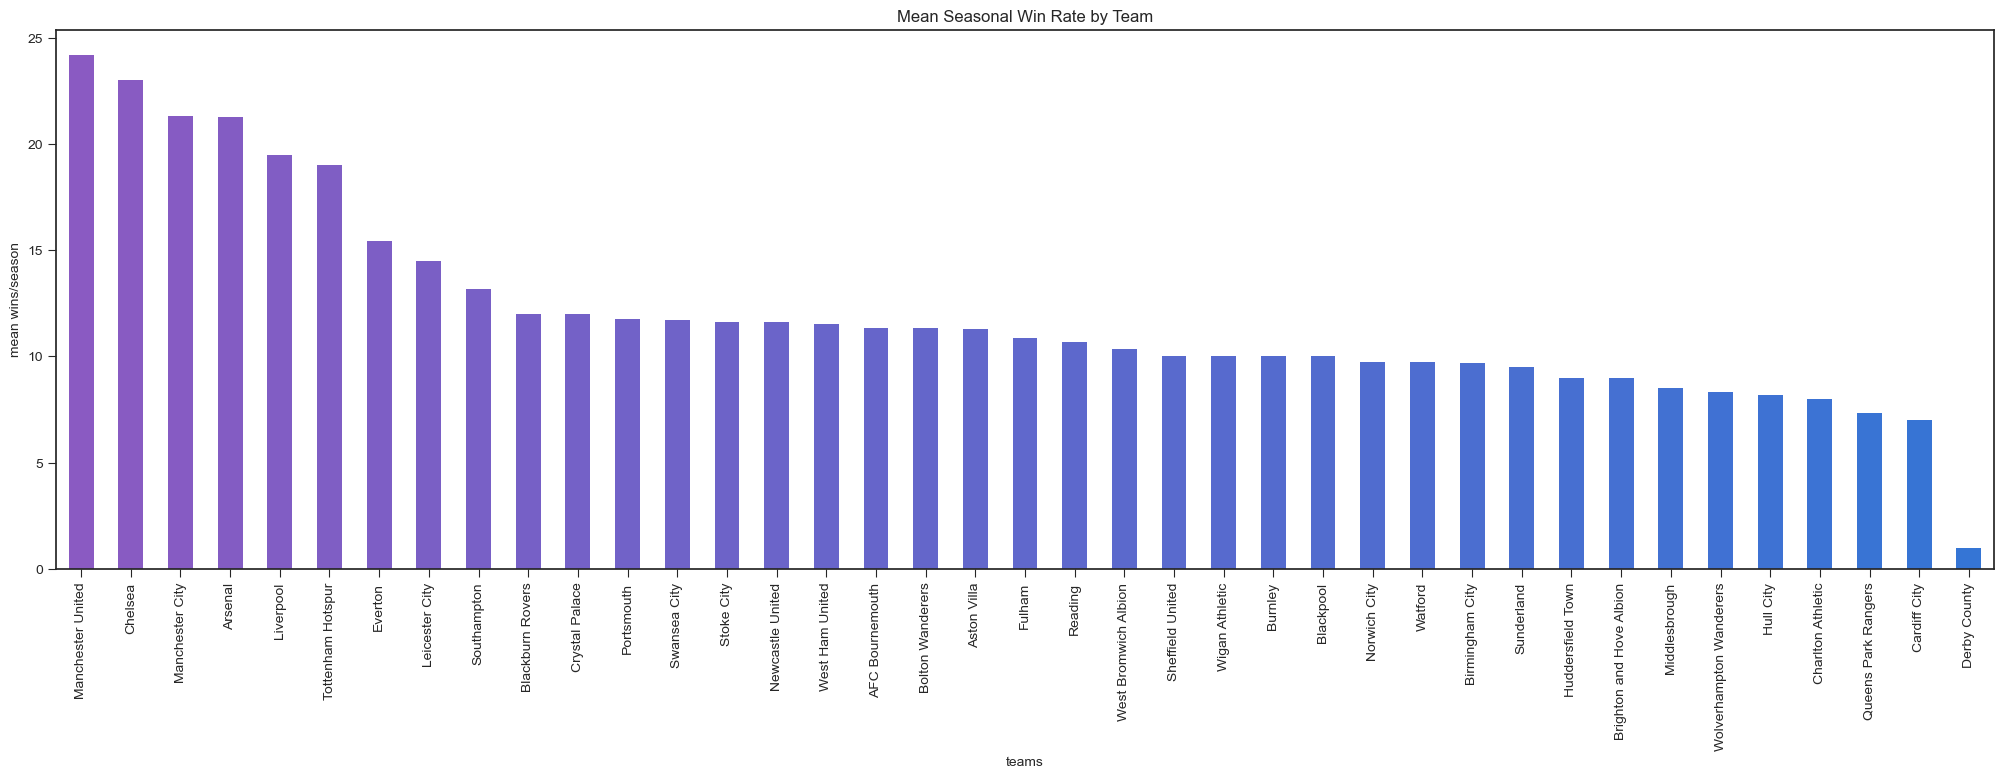

In [26]:
#plot style
plt.style.use('seaborn-ticks')
#desired colors
color1 = "#8A5AC2"
color2 = "#3575D5"

wins_viz.groupby(['team'])['mean'].head().plot(kind='bar', 
                                         figsize=(25,7),
                                         title='Mean Seasonal Win Rate by Team',
                                         xlabel='teams',
                                         ylabel='mean wins/season',
                                         color=get_gradient(color1, color2, len(wins_viz))
                                         )                                         

plt.show()

The plot above shows the mean team win rate across the seasons

In [27]:
goals(prem_stats)

mean  min  median  max        std
team                                                            
Manchester United         72.250000   49    73.0   89  13.315234
Manchester City           72.166667   29    72.0  106  22.638797
Arsenal                   71.750000   63    72.0   83   5.395705
Chelsea                   71.583333   59    68.5  103  12.041280
Liverpool                 68.083333   47    65.0  101  15.102428
Tottenham Hotspur         63.666667   45    66.0   86  10.603030
Blackpool                 55.000000   55    55.0   55        NaN
Leicester City            54.500000   46    52.0   68   9.983319
Everton                   54.333333   44    55.0   62   5.565042
Southampton               49.000000   37    51.5   59   8.461678
AFC Bournemouth           48.333333   45    45.0   55   5.773503
Blackburn Rovers          46.166667   40    47.0   52   4.833908
Reading                   45.333333   41    43.0   52   5.859465
West Ham United           45.272727   35    44.0   65   7.511204
Aston Villa               44.900000   27    45.0   71  12.661841
Newcastle United          44.600000   38    43.5   56   6.501282
Bolton Wanderers          44.000000   36    44.0   52   5.549775
Swansea City              43.714286   28    45.0   54   7.889112
Crystal Palace            42.800000   33    45.0   50   6.797058
Fulham                    42.625000   38    39.5   50   5.343554
West Bromwich Albion      42.111111   31    43.0   56   8.403042
Portsmouth                41.250000   34    41.5   48   6.396614
Birmingham City           40.333333   37    38.0   46   4.932883
Norwich City              40.000000   28    40.0   52   9.831921
Sunderland                39.800000   29    41.0   48   6.941021
Stoke City                39.800000   34    39.5   48   5.202563
Wolverhampton Wanderers   39.333333   32    40.0   46   7.023769
Wigan Athletic            38.714286   34    37.0   47   4.680252
Queens Park Rangers       38.333333   30    42.0   43   7.234178
Watford                   38.250000   29    40.0   44   6.448514
Burnley                   36.250000   28    37.5   42   6.020797
Hull City                 36.200000   33    37.0   39   2.588436
Middlesbrough             35.500000   27    35.5   44   9.255629
Brighton and Hove Albion  34.000000   34    34.0   34        NaN
Charlton Athletic         34.000000   34    34.0   34        NaN
Sheffield United          32.000000   32    32.0   32        NaN
Cardiff City              32.000000   32    32.0   32        NaN
Huddersfield Town         28.000000   28    28.0   28        NaN
Derby County              20.000000   20    20.0   20        NaN

Descriptive statistics for each teams average goals are returned in this output. The top 4 teams averaged between 71 to 72 goals across all seasons. Derby County is still at the bottom with a low of 20 goals Their max is also 20. This indicates that Derby County was only in the premier league for one season between 2006 and 2018. They won just once and scored only 20 goals that season. Cardiff City, Charlton are still among the bottom even for goals. Goals ultimately win games so the more goals scored the more likely a team wins. Scoring more goals means the team is better at finishing chances.

There are key player positions that impact the goal scoring on a team. All teams in world football play with attackers and always have a striker leading the line especially in English football. Lower goals suggest that the attackers simply aren't good enough or the coaching staff aren't drawing up effective tactics for their attackers. 

In [28]:
goals_viz = goals(prem_stats)
goals_viz.head()

mean  min  median  max        std
team                                                     
Manchester United  72.250000   49    73.0   89  13.315234
Manchester City    72.166667   29    72.0  106  22.638797
Arsenal            71.750000   63    72.0   83   5.395705
Chelsea            71.583333   59    68.5  103  12.041280
Liverpool          68.083333   47    65.0  101  15.102428

C:\Users\tofaj\AppData\Local\Temp\ipykernel_23388\2669049015.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


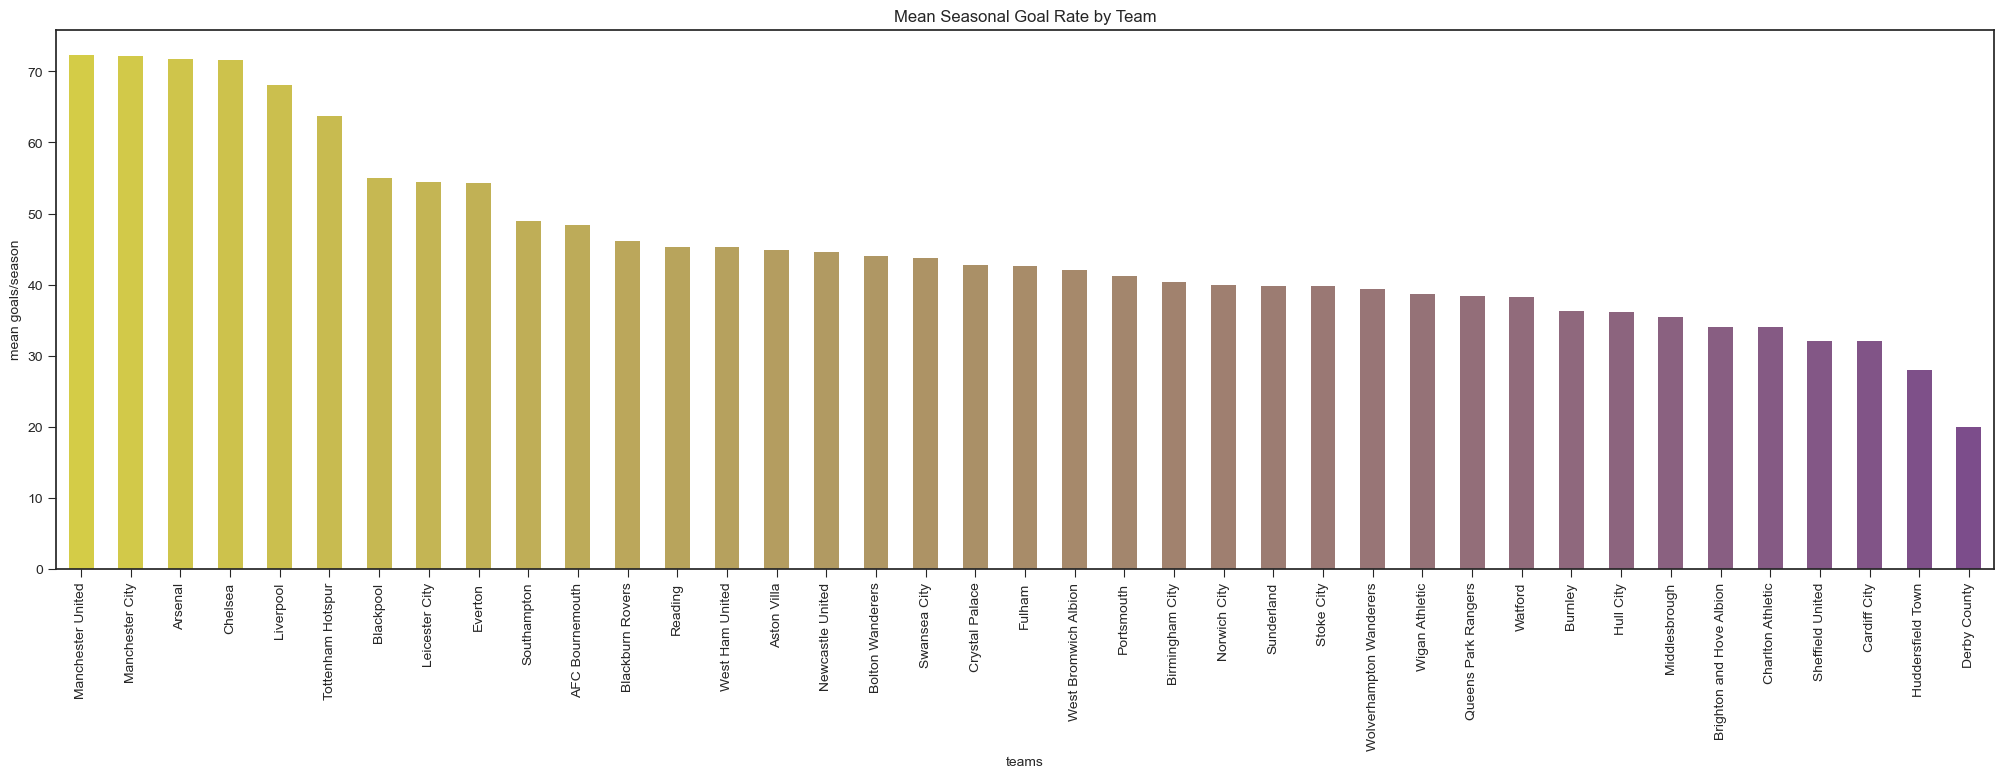

In [29]:
#plot style
plt.style.use('seaborn-ticks')
#desired colors
color1 = "#D4CC47"
color2 = "#7C4D8B"

goals_viz.groupby(['team'])['mean'].head().plot(kind='bar', 
                                         figsize=(25,7),
                                         title='Mean Seasonal Goal Rate by Team',
                                         xlabel='teams',
                                         ylabel='mean goals/season',
                                         color=get_gradient(color1, color2, len(goals_viz))
                                         )                                         

plt.show()

The output displays the mean goal rate for teams across all seasons

In [30]:
losses(prem_stats)

mean  min  median  max       std
team                                                           
Derby County              29.000000   29    29.0   29       NaN
Cardiff City              22.000000   22    22.0   22       NaN
Queens Park Rangers       22.000000   21    21.0   24  1.732051
Wolverhampton Wanderers   20.333333   18    20.0   23  2.516611
Hull City                 20.200000   19    20.0   22  1.303840
Sheffield United          20.000000   20    20.0   20       NaN
Charlton Athletic         20.000000   20    20.0   20       NaN
Reading                   19.666667   15    22.0   22  4.041452
Blackpool                 19.000000   19    19.0   19       NaN
Watford                   19.000000   17    19.5   20  1.414214
Huddersfield Town         19.000000   19    19.0   19       NaN
Burnley                   18.750000   12    19.5   24  4.991660
Bolton Wanderers          18.166667   14    19.0   22  2.786874
Sunderland                18.100000   14    17.0   26  3.665151
Middlesbrough             18.000000   16    18.0   20  2.309401
Crystal Palace            18.000000   16    18.0   21  2.121320
Wigan Athletic            18.000000   14    18.0   20  2.236068
Norwich City              18.000000   14    18.0   22  4.082483
West Bromwich Albion      17.111111   15    17.0   22  2.204793
Newcastle United          17.100000   11    18.0   19  2.643651
Swansea City              16.857143   14    15.0   21  3.132016
AFC Bournemouth           16.666667   16    16.0   18  1.154701
Portsmouth                16.500000   12    15.0   24  5.446712
West Ham United           16.454545    8    16.0   21  3.531675
Blackburn Rovers          16.166667   10    16.5   23  4.262237
Birmingham City           16.000000   14    15.0   19  2.645751
Fulham                    16.000000   11    15.5   24  3.927922
Brighton and Hove Albion  16.000000   16    16.0   16       NaN
Stoke City                15.500000   13    15.0   19  1.957890
Aston Villa               15.000000    8    14.0   27  6.000000
Southampton               14.000000   11    14.5   16  2.097618
Leicester City            13.750000    3    16.5   19  7.365460
Everton                   10.833333    7    10.5   15  2.552479
Tottenham Hotspur          9.666667    4     9.5   15  3.284491
Manchester City            8.916667    2     7.0   18  5.035480
Liverpool                  8.583333    2     9.5   14  3.941812
Arsenal                    7.833333    3     7.5   13  2.405801
Chelsea                    6.583333    3     6.0   12  3.058768
Manchester United          6.416667    4     5.0   12  2.503028

The output shows descriptive statistics for average losses from 2006 to 2018. Manchester United, who had the most wins, also had the lowest amount of losses. Everytime a team losses, they gets no points added to their tally. Derby County lost 29 games in that same season. Everything else were draws for them. The same top six teams which include both Machester teams, Chelsea, Arsenal, Liverpool and Tottenham all averaged the lowest losses. The results suggest that the teams have solid defences compared to the rest of the team. Every season there are 38 games played. If a team wants to make the top six they would have to average around 9 losses every season in those 38 games.

Goal scoring win games but so does defense. Having a good defensive shape is strictly down to the quality of players and coach tactics. Defenders are usually strong, physical and even sometimes as fast as attackers. Having a high loss ratio would suggest that the team is lacking in the defensive department. Surely bringing new players is an easy solution but when the team doesn't win as much it's hard to attract players. The coach has more pressure in this scenario since he gives out the instructions to the defense.

In [31]:
losses_viz = losses(prem_stats)
losses_viz.head()

mean  min  median  max       std
team                                                          
Derby County             29.000000   29    29.0   29       NaN
Cardiff City             22.000000   22    22.0   22       NaN
Queens Park Rangers      22.000000   21    21.0   24  1.732051
Wolverhampton Wanderers  20.333333   18    20.0   23  2.516611
Hull City                20.200000   19    20.0   22  1.303840

C:\Users\tofaj\AppData\Local\Temp\ipykernel_23388\1963295732.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


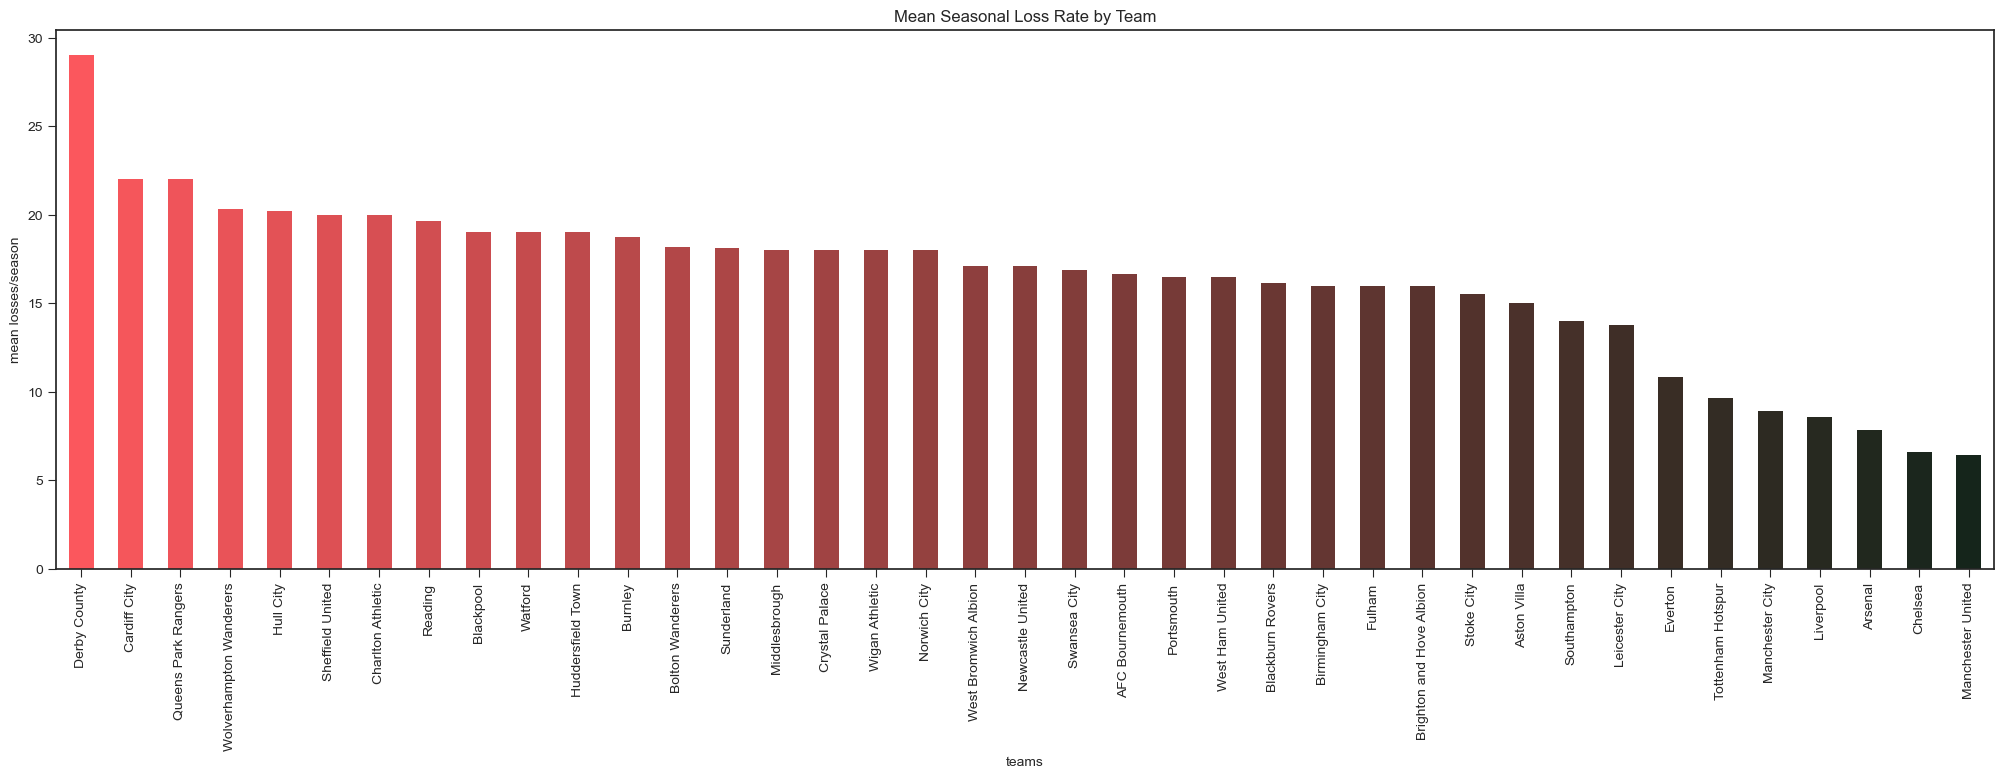

In [32]:
#plot style
plt.style.use('seaborn-ticks')
#desired colors
color1 = '#FB575D'
color2 = '#15251B'

losses_viz.groupby(['team'])['mean'].head().plot(kind='bar', 
                                         figsize=(25,7),
                                         title='Mean Seasonal Loss Rate by Team',
                                         xlabel='teams',
                                         ylabel='mean losses/season',
                                         color=get_gradient(color1, color2, len(losses_viz))
                                         )                                         

plt.show()

The mean loss rate for the teams across the seasons

In [33]:
total_passes(prem_stats)

mean    min   median    max          std
team                                                                      
Arsenal                   20473.750000  18458  20563.0  23524  1440.375022
Manchester United         19517.750000  17422  19556.0  21311   986.562547
Manchester City           19433.583333  12765  20274.5  28241  4134.161528
Liverpool                 19239.916667  16360  19439.5  22962  1989.201597
Chelsea                   19066.666667  16759  19044.0  21264  1290.453009
Swansea City              18535.571429  15721  18169.0  21113  2160.280758
Tottenham Hotspur         17691.083333  14914  17362.0  21660  2180.380762
Southampton               17650.500000  15913  17679.0  19577  1288.553724
AFC Bournemouth           16851.000000  16131  17152.0  17270   626.323399
Everton                   15598.500000  12274  15043.5  18809  2171.388266
Fulham                    15328.625000  11820  16222.5  17669  2118.008090
Blackpool                 15113.000000  15113  15113.0  15113          NaN
Huddersfield Town         14960.000000  14960  14960.0  14960          NaN
Brighton and Hove Albion  14675.000000  14675  14675.0  14675          NaN
Newcastle United          14643.000000  13947  14613.5  16087   644.670976
Norwich City              14449.500000  13403  14615.0  15165   752.048536
Wolverhampton Wanderers   14234.333333  13020  14823.0  14860  1051.806224
Wigan Athletic            14133.000000  11353  14753.0  17927  2428.798263
Cardiff City              14007.000000  14007  14007.0  14007          NaN
West Ham United           13935.545455  12364  13773.0  15316  1026.479943
Leicester City            13896.000000  13343  13520.5  15200   881.953514
Hull City                 13853.400000  11731  14864.0  15596  1919.660465
West Bromwich Albion      13809.111111  11825  14367.0  14704  1099.572922
Aston Villa               13794.500000  11438  13555.0  16527  1461.368099
Watford                   13602.000000  10175  14289.5  15654  2381.597923
Queens Park Rangers       13558.000000  13383  13632.0  13659   152.154527
Sunderland                13461.400000  12359  13511.0  14457   843.275650
Middlesbrough             13459.750000  12200  12951.5  15736  1564.654674
Portsmouth                13354.000000  12616  13151.5  14497   854.150260
Burnley                   13338.250000  12558  13581.5  13632   520.768903
Crystal Palace            13112.400000  11792  13542.0  14372  1123.778136
Stoke City                12775.400000   9478  12589.5  16342  2496.552654
Blackburn Rovers          12752.166667  11178  12930.0  14033  1133.303210
Birmingham City           12735.333333  10630  13540.0  14036  1840.061231
Charlton Athletic         12722.000000  12722  12722.0  12722          NaN
Bolton Wanderers          12098.500000  10649  12127.0  13580  1029.129292
Derby County              11739.000000  11739  11739.0  11739          NaN
Reading                   11156.333333  10431  11232.0  11806   690.615909
Sheffield United          11123.000000  11123  11123.0  11123          NaN

The total passes statistics provides more evidence as to why the top teams stay at the top. Passing in soccer is one of the most important fundamentals. A team that is willing to keep possession and create chances often generate a large number of passes. The output shows that Arsenal and both Manchester teams have the highest mean passing throughout the seasons. Derby County is amongst the bottom 3 teams and it's clear to see why. 

Generating passes usually comes from the midfield position. Tactics have a heavy part to play in the midfield structure. Most would say that this position is the heart of the team and when the midfield crumbles, the team crumble. Manchester United have won the most games and the fact that the team holds second for the mean total passes provides sufficient evidence. As long as they continue to pass the ball more, they will keep getting chances to score goals and therefore win more games. The smaller teams should look towards their midfield if they aren't completing as many passes. This might be because their players give the ball away easily or they are weak in possession and often times get dispossessed. This dataset unfortunately didn't have the dispossessed values as the column was full of NAs.

In [34]:
szngoals(prem_stats)

mean  min  median  max        std
season                                       
2011-2012  53.30   36    47.5   93  16.134631
2016-2017  53.20   27    47.5   86  18.529067
2010-2011  53.15   37    51.5   78  10.599280
2012-2013  53.15   30    48.0   86  14.758673
2009-2010  52.65   32    44.5  103  20.319229
2013-2014  52.60   28    44.0  102  20.615273
2015-2016  51.30   27    48.5   71  13.163346
2017-2018  50.90   28    44.5  106  20.968397
2007-2008  50.10   20    45.5   80  15.673981
2014-2015  48.75   28    46.5   83  14.767942
2008-2009  47.10   28    40.5   77  14.010898
2006-2007  46.55   29    44.5   83  13.743802

These are the season stats for goal averages in descending order. The season 2011-2012 had the most goal average with 53.30 goals and the 2006-2007 had the lowest goal average.

In [35]:
szngoals_viz = szngoals(prem_stats)
szngoals_viz.head()

mean  min  median  max        std
season                                       
2011-2012  53.30   36    47.5   93  16.134631
2016-2017  53.20   27    47.5   86  18.529067
2010-2011  53.15   37    51.5   78  10.599280
2012-2013  53.15   30    48.0   86  14.758673
2009-2010  52.65   32    44.5  103  20.319229

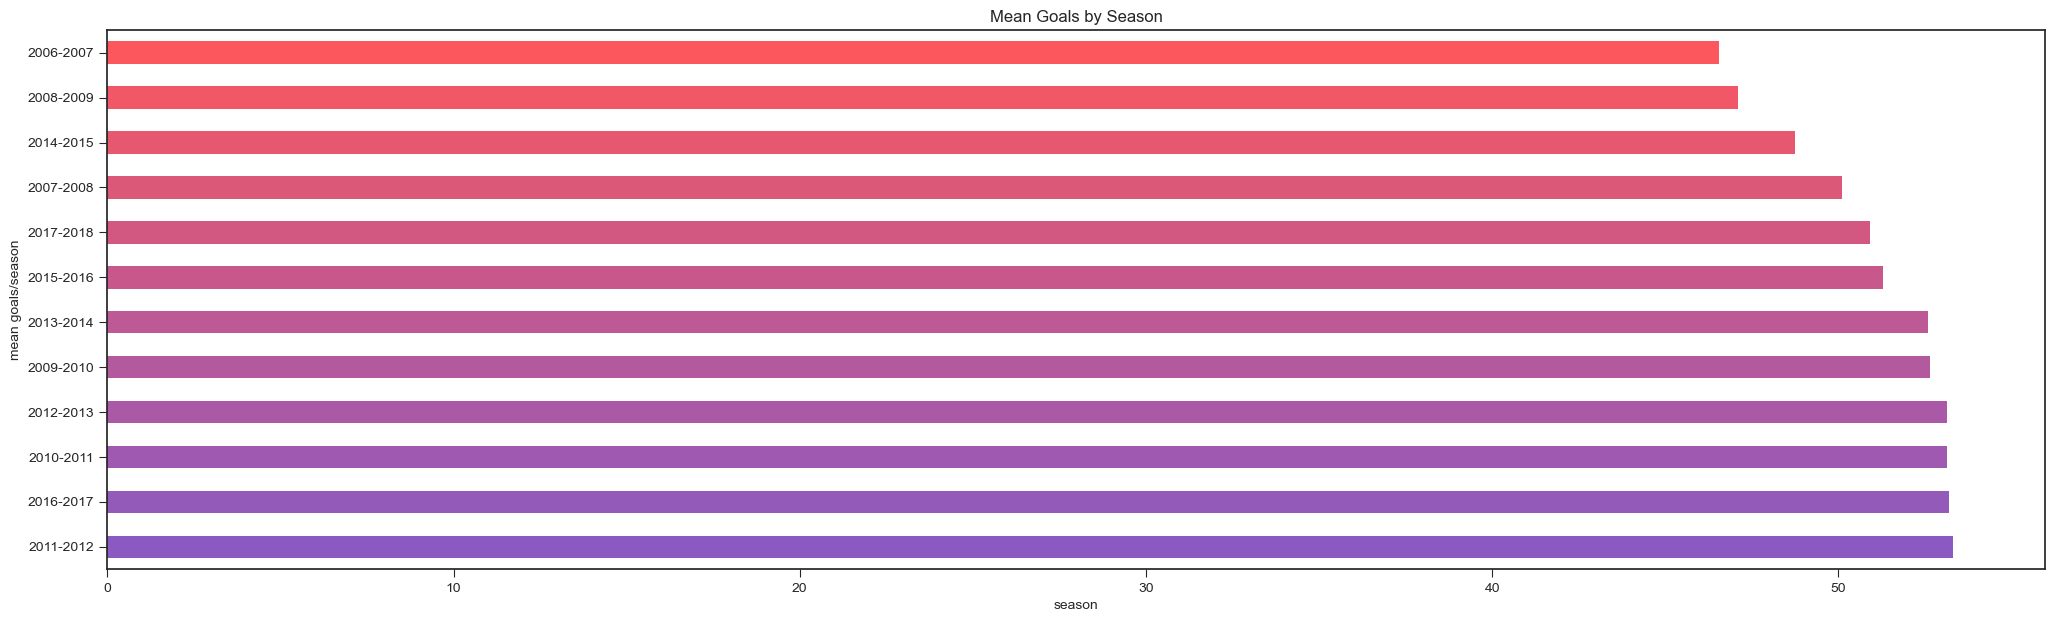

In [36]:
#plot style
plt.style.use('tableau-colorblind10')
#desired colors
color1 = "#8A5AC2"
color2 = '#FB575D'

szngoals_viz.groupby(['season'])['mean'].head().plot(kind='barh', 
                                         figsize=(25,7),
                                         title='Mean Goals by Season',
                                         xlabel='season',
                                         ylabel='mean goals/season',
                                         color=get_gradient(color1, color2, len(szngoals_viz))
                                         )                                         

plt.show()

Mean goals per season

In [37]:
home_goals(prem_results)

home_team     season  home_goals
51                    Chelsea  2009-2010          68
115           Manchester City  2013-2014          63
119           Manchester City  2017-2018          61
113           Manchester City  2011-2012          55
58                    Chelsea  2016-2017          55
14                    Arsenal  2017-2018          54
103                 Liverpool  2013-2014          53
123         Manchester United  2009-2010          52
125         Manchester United  2011-2012          52
124         Manchester United  2010-2011          49
6                     Arsenal  2009-2010          48
121         Manchester United  2007-2008          47
9                     Arsenal  2012-2013          47
117           Manchester City  2015-2016          47
204         Tottenham Hotspur  2016-2017          47
195         Tottenham Hotspur  2007-2008          46
120         Manchester United  2006-2007          46
107                 Liverpool  2017-2018          45
106                 Liverpool  2016-2017          45
126         Manchester United  2012-2013          45
116           Manchester City  2014-2015          44
55                    Chelsea  2013-2014          43
99                  Liverpool  2009-2010          43
122         Manchester United  2008-2009          43
3                     Arsenal  2006-2007          43
97                  Liverpool  2007-2008          43
76                    Everton  2016-2017          42
114           Manchester City  2012-2013          41
111           Manchester City  2009-2010          41
98                  Liverpool  2008-2009          41
139          Newcastle United  2010-2011          41
54                    Chelsea  2012-2013          41
53                    Chelsea  2011-2012          41
128         Manchester United  2014-2015          41
11                    Arsenal  2014-2015          41
205         Tottenham Hotspur  2017-2018          40
197         Tottenham Hotspur  2009-2010          40
110           Manchester City  2008-2009          40
199         Tottenham Hotspur  2011-2012          39
96                  Liverpool  2006-2007          39
164               Southampton  2015-2016          39
8                     Arsenal  2011-2012          39
52                    Chelsea  2010-2011          39
13                    Arsenal  2016-2017          39
131         Manchester United  2017-2018          38
73                    Everton  2013-2014          38
4                     Arsenal  2007-2008          37
118           Manchester City  2016-2017          37
100                 Liverpool  2010-2011          37
48                    Chelsea  2006-2007          37
163               Southampton  2014-2015          37
49                    Chelsea  2007-2008          36
10                    Arsenal  2013-2014          36
83                     Fulham  2011-2012          36
56                    Chelsea  2014-2015          36
69                    Everton  2009-2010          35
93             Leicester City  2015-2016          35
203         Tottenham Hotspur  2015-2016          35
75                    Everton  2015-2016          35
1             AFC Bournemouth  2016-2017          35
194         Tottenham Hotspur  2006-2007          34
67                    Everton  2007-2008          34
227           West Ham United  2015-2016          34
112           Manchester City  2010-2011          34
16                Aston Villa  2007-2008          34
39           Bolton Wanderers  2010-2011          34
224           West Ham United  2012-2013          34
102                 Liverpool  2012-2013          33
66                    Everton  2006-2007          33
7                     Arsenal  2010-2011          33
189              Swansea City  2013-2014          33
72                    Everton  2012-2013          33
50                    Chelsea  2008-2009          33
105                 Liverpool  2015-2016          33
179                Sunderland  2009-2010     

This statistic had the total number of goals at home for a team from the results dataset. This stat is important because home advantage is a big thing in soccer. Having the home crowd behind a team as they play to win is vital. It's easier to win games while being supported by thousands of fans so team must use that energy to motivate them further in winning. 

As the output shows, the top 5 teams which are Manchester United, Chelsea, Manchester City, Arsenal and Liverpool all rank amongst the teams that score the most goals. With the exception of Manchester City's 2006-2007 season, you wouldn't find any of these teams amongst the bottom. This statistic could suggest that these teams are more comfortable playing at home. 
When a team is that good their home ground becomes a fortress and it installs fear into the away side. When the top teams clash the home team is always expected to win.

In [38]:
away_goals(prem_results)

away_team     season  away_goals
103                 Liverpool  2013-2014          48
119           Manchester City  2017-2018          45
118           Manchester City  2016-2017          43
126         Manchester United  2012-2013          41
7                     Arsenal  2010-2011          39
116           Manchester City  2014-2015          39
204         Tottenham Hotspur  2016-2017          39
115           Manchester City  2013-2014          39
107                 Liverpool  2017-2018          39
113           Manchester City  2011-2012          38
102                 Liverpool  2012-2013          38
13                    Arsenal  2016-2017          38
16                Aston Villa  2007-2008          37
56                    Chelsea  2014-2015          37
125         Manchester United  2011-2012          37
200         Tottenham Hotspur  2012-2013          37
120         Manchester United  2006-2007          37
4                     Arsenal  2007-2008          37
5                     Arsenal  2008-2009          37
98                  Liverpool  2008-2009          36
50                    Chelsea  2008-2009          35
51                    Chelsea  2009-2010          35
127         Manchester United  2013-2014          35
8                     Arsenal  2011-2012          35
6                     Arsenal  2009-2010          35
54                    Chelsea  2012-2013          34
205         Tottenham Hotspur  2017-2018          34
12                    Arsenal  2015-2016          34
203         Tottenham Hotspur  2015-2016          34
123         Manchester United  2009-2010          34
93             Leicester City  2015-2016          33
106                 Liverpool  2016-2017          33
121         Manchester United  2007-2008          33
10                    Arsenal  2013-2014          32
59                    Chelsea  2017-2018          32
111           Manchester City  2009-2010          32
227           West Ham United  2015-2016          31
95             Leicester City  2017-2018          31
105                 Liverpool  2015-2016          30
58                    Chelsea  2016-2017          30
52                    Chelsea  2010-2011          30
131         Manchester United  2017-2018          30
11                    Arsenal  2014-2015          30
124         Manchester United  2010-2011          29
49                    Chelsea  2007-2008          29
228           West Ham United  2016-2017          28
130         Manchester United  2016-2017          28
55                    Chelsea  2013-2014          28
57                    Chelsea  2015-2016          27
202         Tottenham Hotspur  2014-2015          27
199         Tottenham Hotspur  2011-2012          27
197         Tottenham Hotspur  2009-2010          27
17                Aston Villa  2008-2009          27
48                    Chelsea  2006-2007          27
140          Newcastle United  2011-2012          27
112           Manchester City  2010-2011          26
211      West Bromwich Albion  2010-2011          26
61             Crystal Palace  2014-2015          26
63             Crystal Palace  2016-2017          26
198         Tottenham Hotspur  2010-2011          25
9                     Arsenal  2012-2013          25
114           Manchester City  2012-2013          25
34                  Blackpool  2010-2011          25
69                    Everton  2009-2010          25
122         Manchester United  2008-2009          25
201         Tottenham Hotspur  2013-2014          25
185                Sunderland  2015-2016          25
68                    Everton  2008-2009          24
117           Manchester City  2015-2016          24
21                Aston Villa  2012-2013          24
212      West Bromwich Albion  2011-2012          24
229           West Ham United  2017-2018          24
75                    Everton  2015-2016          24
97                  Liverpool  2007-2008          24
151                Portsmouth  2007-2008     

It not easy to win away from home, even if you're a top team. Even the smallest of teams in the premier league can cause upsets to the best teams if they're playing at home. Having the confidence to go to away grounds and win games is very crucial. Compared to the home statistic, the goals away aren't as high. This further proves how hard it is score away from home. The mentality to win must drive them to score which is also down to the character of the players.

In [39]:
target_shots(prem_stats)

mean  min  median  max        std
team                                                             
Chelsea                   222.250000  173   218.0  288  28.772225
Arsenal                   221.000000  201   223.0  238  13.066265
Liverpool                 217.166667  189   214.0  258  20.153201
Tottenham Hotspur         211.000000  171   205.5  257  29.863325
Manchester United         210.833333  144   212.5  260  34.693026
Manchester City           208.500000  143   213.0  265  38.225408
Everton                   173.833333  121   172.0  207  22.914201
Southampton               167.500000  145   168.0  179  12.453915
Portsmouth                162.250000  151   156.0  186  16.337584
Wigan Athletic            161.000000  141   163.0  174  12.463279
Blackpool                 161.000000  161   161.0  161        NaN
Fulham                    158.125000  142   151.5  195  17.723572
West Ham United           155.272727  122   154.0  191  22.410225
Blackburn Rovers          154.500000  135   151.5  185  17.478558
Newcastle United          153.900000  125   152.0  182  16.907921
AFC Bournemouth           153.666667  143   158.0  160   9.291573
Bolton Wanderers          153.666667  120   158.5  173  18.457158
Leicester City            152.500000  137   147.0  179  18.357560
Queens Park Rangers       148.666667  146   150.0  150   2.309401
Sheffield United          147.000000  147   147.0  147        NaN
Aston Villa               146.700000  110   147.5  182  21.018775
West Bromwich Albion      145.333333  107   146.0  184  27.586228
Crystal Palace            144.800000  138   143.0  153   6.870226
Norwich City              143.750000  129   141.0  164  15.713582
Swansea City              143.428571  103   145.0  167  20.703117
Sunderland                140.200000  119   140.0  159  11.203174
Birmingham City           139.666667  121   143.0  155  17.243356
Watford                   137.500000  132   137.5  143   4.932883
Wolverhampton Wanderers   136.666667  119   139.0  152  16.623277
Middlesbrough             134.000000  100   142.0  152  23.209194
Charlton Athletic         133.000000  133   133.0  133        NaN
Hull City                 131.600000  120   131.0  149  10.830512
Burnley                   131.500000  120   126.5  153  14.708274
Reading                   130.666667  128   132.0  132   2.309401
Cardiff City              124.000000  124   124.0  124        NaN
Stoke City                123.400000   94   130.0  143  17.050253
Brighton and Hove Albion  119.000000  119   119.0  119        NaN
Derby County              116.000000  116   116.0  116        NaN
Huddersfield Town         109.000000  109   109.0  109        NaN

As the output reveals, the top 6 teams all have the most shots on target across all the seasons. This is understandable when looking back at the average goals and wins. The bottom teams still find themselves in that position because getting a shot on target leads to scoring. Football fans will notice when a team gets closer to scoring with the way the opposing keeper is pressured. Even at times when they don't get the result they want, getting several shots on target is very encouraging going into the next game. A team can generate the most shots but if they're not on target, they won't score.

Again, the position that is most reponsible are the attackers which include the strikers and the wingers. Better strikers must be bought for the bottom teams to be able to compete with the top teams.

In [40]:
total_shots(prem_stats)

mean  min  median  max        std
team                                                             
Chelsea                   656.833333  526   631.0  834  94.647512
Liverpool                 655.666667  582   646.5  739  48.443657
Tottenham Hotspur         617.083333  520   640.0  701  66.657139
Arsenal                   611.583333  523   618.5  662  43.025274
Manchester United         600.000000  430   604.5  715  92.920298
Manchester City           597.916667  423   624.0  738  95.432469
Blackpool                 531.000000  531   531.0  531        NaN
Portsmouth                529.250000  500   529.0  559  24.308778
Queens Park Rangers       524.333333  500   534.0  539  21.221059
Wigan Athletic            519.714286  474   511.0  590  40.173434
Southampton               513.000000  450   517.5  550  34.176015
Everton                   512.750000  359   499.0  633  71.574659
Bolton Wanderers          494.333333  404   491.5  570  63.019574
West Ham United           493.454545  372   499.0  572  59.076837
Fulham                    484.125000  431   466.0  547  43.238335
Sheffield United          483.000000  483   483.0  483        NaN
Newcastle United          480.300000  397   474.5  579  50.844097
Blackburn Rovers          479.333333  453   475.5  530  28.598368
West Bromwich Albion      474.444444  378   487.0  597  82.557724
AFC Bournemouth           460.333333  452   464.0  465   7.234178
Leicester City            458.500000  423   444.5  522  44.530888
Aston Villa               456.100000  380   454.0  511  42.362064
Wolverhampton Wanderers   456.000000  436   459.0  473  18.681542
Sunderland                453.200000  387   451.0  532  43.414795
Norwich City              453.000000  413   442.5  514  47.406047
Middlesbrough             450.500000  351   476.0  499  69.572504
Crystal Palace            447.800000  414   441.0  476  25.053942
Swansea City              440.285714  338   441.0  504  57.852440
Watford                   431.500000  418   431.0  446  13.601471
Hull City                 423.200000  388   427.0  476  34.463024
Birmingham City           422.333333  401   414.0  452  26.501572
Reading                   418.000000  394   419.0  441  23.515952
Charlton Athletic         418.000000  418   418.0  418        NaN
Cardiff City              418.000000  418   418.0  418        NaN
Stoke City                417.000000  364   410.5  500  44.517163
Burnley                   414.500000  378   410.5  459  36.990990
Brighton and Hove Albion  384.000000  384   384.0  384        NaN
Derby County              376.000000  376   376.0  376        NaN
Huddersfield Town         362.000000  362   362.0  362        NaN

As well as having the most shots on target, the top 6 teams also have the most total shots. The more shots the players take, the better the chances of scoring. If a team doesn't shoot enough, the goals will not come. 

In [41]:
shots_viz = total_shots(prem_stats)
shots_viz.head()

mean  min  median  max        std
team                                                      
Chelsea            656.833333  526   631.0  834  94.647512
Liverpool          655.666667  582   646.5  739  48.443657
Tottenham Hotspur  617.083333  520   640.0  701  66.657139
Arsenal            611.583333  523   618.5  662  43.025274
Manchester United  600.000000  430   604.5  715  92.920298

C:\Users\tofaj\AppData\Local\Temp\ipykernel_23388\3473711966.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


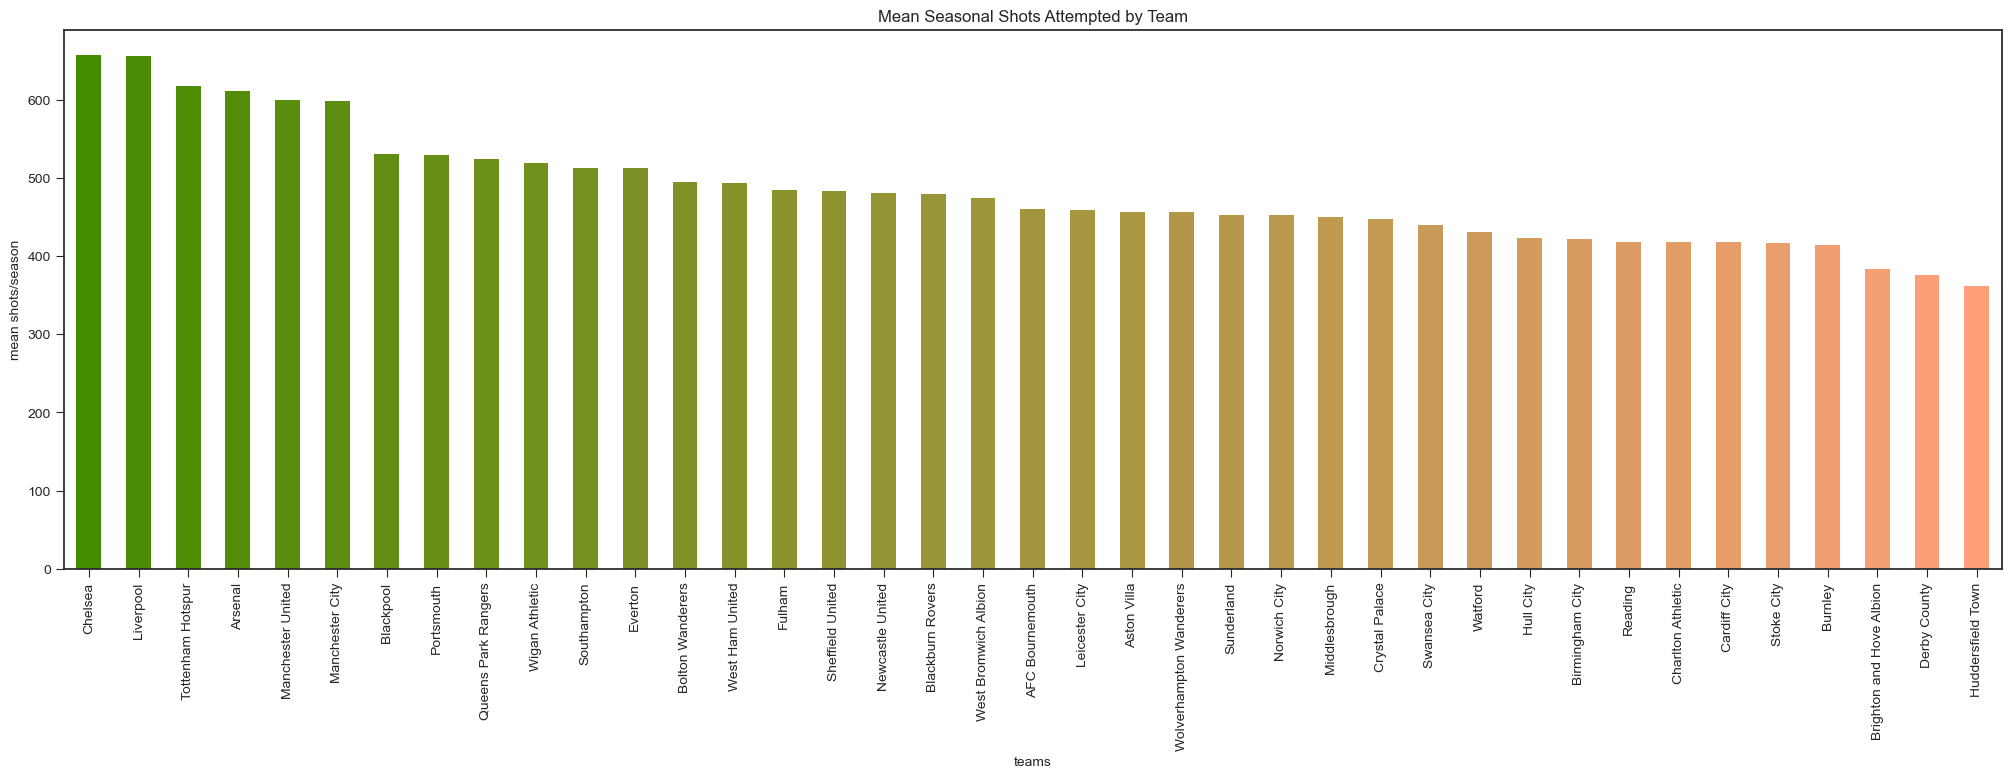

In [42]:
#plot style
plt.style.use('seaborn-ticks')
#desired colors
color1 = "#458B00"
color2 = "#FFA07A"

shots_viz.groupby(['team'])['mean'].head().plot(kind='bar', 
                                         figsize=(25,7),
                                         title='Mean Seasonal Shots Attempted by Team',
                                         xlabel='teams',
                                         ylabel='mean shots/season',
                                         color=get_gradient(color1, color2, len(shots_viz))
                                         )                                         

plt.show()

In [43]:
home_goalratio = prem_results.groupby(['home_team', 'season'], as_index=False)['home_goals'].mean()
home_goalratio.sort_values(by = 'home_goals', ascending = False)

home_team     season  home_goals
51                    Chelsea  2009-2010    3.578947
115           Manchester City  2013-2014    3.315789
119           Manchester City  2017-2018    3.210526
113           Manchester City  2011-2012    2.894737
58                    Chelsea  2016-2017    2.894737
14                    Arsenal  2017-2018    2.842105
103                 Liverpool  2013-2014    2.789474
123         Manchester United  2009-2010    2.736842
125         Manchester United  2011-2012    2.736842
124         Manchester United  2010-2011    2.578947
6                     Arsenal  2009-2010    2.526316
121         Manchester United  2007-2008    2.473684
9                     Arsenal  2012-2013    2.473684
117           Manchester City  2015-2016    2.473684
204         Tottenham Hotspur  2016-2017    2.473684
195         Tottenham Hotspur  2007-2008    2.421053
120         Manchester United  2006-2007    2.421053
107                 Liverpool  2017-2018    2.368421
106                 Liverpool  2016-2017    2.368421
126         Manchester United  2012-2013    2.368421
116           Manchester City  2014-2015    2.315789
55                    Chelsea  2013-2014    2.263158
99                  Liverpool  2009-2010    2.263158
122         Manchester United  2008-2009    2.263158
3                     Arsenal  2006-2007    2.263158
97                  Liverpool  2007-2008    2.263158
76                    Everton  2016-2017    2.210526
114           Manchester City  2012-2013    2.157895
111           Manchester City  2009-2010    2.157895
98                  Liverpool  2008-2009    2.157895
139          Newcastle United  2010-2011    2.157895
54                    Chelsea  2012-2013    2.157895
53                    Chelsea  2011-2012    2.157895
128         Manchester United  2014-2015    2.157895
11                    Arsenal  2014-2015    2.157895
205         Tottenham Hotspur  2017-2018    2.105263
197         Tottenham Hotspur  2009-2010    2.105263
110           Manchester City  2008-2009    2.105263
199         Tottenham Hotspur  2011-2012    2.052632
96                  Liverpool  2006-2007    2.052632
164               Southampton  2015-2016    2.052632
8                     Arsenal  2011-2012    2.052632
52                    Chelsea  2010-2011    2.052632
13                    Arsenal  2016-2017    2.052632
131         Manchester United  2017-2018    2.000000
73                    Everton  2013-2014    2.000000
4                     Arsenal  2007-2008    1.947368
118           Manchester City  2016-2017    1.947368
100                 Liverpool  2010-2011    1.947368
48                    Chelsea  2006-2007    1.947368
163               Southampton  2014-2015    1.947368
49                    Chelsea  2007-2008    1.894737
10                    Arsenal  2013-2014    1.894737
83                     Fulham  2011-2012    1.894737
56                    Chelsea  2014-2015    1.894737
69                    Everton  2009-2010    1.842105
93             Leicester City  2015-2016    1.842105
203         Tottenham Hotspur  2015-2016    1.842105
75                    Everton  2015-2016    1.842105
1             AFC Bournemouth  2016-2017    1.842105
194         Tottenham Hotspur  2006-2007    1.789474
67                    Everton  2007-2008    1.789474
227           West Ham United  2015-2016    1.789474
112           Manchester City  2010-2011    1.789474
16                Aston Villa  2007-2008    1.789474
39           Bolton Wanderers  2010-2011    1.789474
224           West Ham United  2012-2013    1.789474
102                 Liverpool  2012-2013    1.736842
66                    Everton  2006-2007    1.736842
7                     Arsenal  2010-2011    1.736842
189              Swansea City  2013-2014    1.736842
72                    Everton  2012-2013    1.736842
50                    Chelsea  2008-2009    1.736842
105                 Liverpool  2015-2016    1.736842
179                Sunderland  2009-2010    1

The output explains that averages for home goals for each season ranked in descending order.

In [44]:
away_goalratio = prem_results.groupby(['away_team', 'season'], as_index=False)['away_goals'].mean()
away_goalratio.sort_values(by = 'away_goals', ascending = False)

away_team     season  away_goals
103                 Liverpool  2013-2014    2.526316
119           Manchester City  2017-2018    2.368421
118           Manchester City  2016-2017    2.263158
126         Manchester United  2012-2013    2.157895
7                     Arsenal  2010-2011    2.052632
116           Manchester City  2014-2015    2.052632
204         Tottenham Hotspur  2016-2017    2.052632
115           Manchester City  2013-2014    2.052632
107                 Liverpool  2017-2018    2.052632
113           Manchester City  2011-2012    2.000000
102                 Liverpool  2012-2013    2.000000
13                    Arsenal  2016-2017    2.000000
16                Aston Villa  2007-2008    1.947368
56                    Chelsea  2014-2015    1.947368
125         Manchester United  2011-2012    1.947368
200         Tottenham Hotspur  2012-2013    1.947368
120         Manchester United  2006-2007    1.947368
4                     Arsenal  2007-2008    1.947368
5                     Arsenal  2008-2009    1.947368
98                  Liverpool  2008-2009    1.894737
50                    Chelsea  2008-2009    1.842105
51                    Chelsea  2009-2010    1.842105
127         Manchester United  2013-2014    1.842105
8                     Arsenal  2011-2012    1.842105
6                     Arsenal  2009-2010    1.842105
54                    Chelsea  2012-2013    1.789474
205         Tottenham Hotspur  2017-2018    1.789474
12                    Arsenal  2015-2016    1.789474
203         Tottenham Hotspur  2015-2016    1.789474
123         Manchester United  2009-2010    1.789474
93             Leicester City  2015-2016    1.736842
106                 Liverpool  2016-2017    1.736842
121         Manchester United  2007-2008    1.736842
10                    Arsenal  2013-2014    1.684211
59                    Chelsea  2017-2018    1.684211
111           Manchester City  2009-2010    1.684211
227           West Ham United  2015-2016    1.631579
95             Leicester City  2017-2018    1.631579
105                 Liverpool  2015-2016    1.578947
58                    Chelsea  2016-2017    1.578947
52                    Chelsea  2010-2011    1.578947
131         Manchester United  2017-2018    1.578947
11                    Arsenal  2014-2015    1.578947
124         Manchester United  2010-2011    1.526316
49                    Chelsea  2007-2008    1.526316
228           West Ham United  2016-2017    1.473684
130         Manchester United  2016-2017    1.473684
55                    Chelsea  2013-2014    1.473684
57                    Chelsea  2015-2016    1.421053
202         Tottenham Hotspur  2014-2015    1.421053
199         Tottenham Hotspur  2011-2012    1.421053
197         Tottenham Hotspur  2009-2010    1.421053
17                Aston Villa  2008-2009    1.421053
48                    Chelsea  2006-2007    1.421053
140          Newcastle United  2011-2012    1.421053
112           Manchester City  2010-2011    1.368421
211      West Bromwich Albion  2010-2011    1.368421
61             Crystal Palace  2014-2015    1.368421
63             Crystal Palace  2016-2017    1.368421
198         Tottenham Hotspur  2010-2011    1.315789
9                     Arsenal  2012-2013    1.315789
114           Manchester City  2012-2013    1.315789
34                  Blackpool  2010-2011    1.315789
69                    Everton  2009-2010    1.315789
122         Manchester United  2008-2009    1.315789
201         Tottenham Hotspur  2013-2014    1.315789
185                Sunderland  2015-2016    1.315789
68                    Everton  2008-2009    1.263158
117           Manchester City  2015-2016    1.263158
21                Aston Villa  2012-2013    1.263158
212      West Bromwich Albion  2011-2012    1.263158
229           West Ham United  2017-2018    1.263158
75                    Everton  2015-2016    1.263158
97                  Liverpool  2007-2008    1.263158
151                Portsmouth  2007-2008    1

The output explains that averages for away goals for each season ranked in descending order.

In [45]:
min_awaygoals = away_goalratio.min()
min_awaygoals

away_team     AFC Bournemouth
season              2006-2007
away_goals           0.421053
dtype: object

In [46]:
min_homegoals = home_goalratio.min()
min_homegoals

home_team     AFC Bournemouth
season              2006-2007
home_goals           0.526316
dtype: object

In [47]:
import pymongo
from pymongo import MongoClient
client = MongoClient('localhost', 27017) #Call Mongo Server

In [48]:
db = client.prem_leaguedb #Create a new database
db.list_collection_names 

prem_leaguecoll = db.prem_league #Create a new collection within the database 
type(prem_leaguecoll)

pymongo.collection.Collection

In [49]:
prem_doc = prem_stats.to_dict(orient='records') #Puts Prem_stats into dictionary

In [50]:
prem_leaguecoll.insert_many(prem_doc) #Inserts all the stats to database collection within Mongo

In [51]:
finder = prem_leaguecoll.find() 

for doc in finder:
    print(doc) #Returns all the records within the new prem database

{'_id': ObjectId('64e22c1d385334c7a1c3c064'), 'team': 'Manchester United', 'wins': 28, 'losses': 5, 'goals': 83, 'total_yel_card': 60, 'total_red_card': 1, 'total_scoring_att': 698, 'ontarget_scoring_att': 256, 'hit_woodwork': 21, 'att_hd_goal': 12, 'att_pen_goal': 5, 'att_freekick_goal': 1, 'att_ibox_goal': 72, 'att_obox_goal': 11, 'goal_fastbreak': 9, 'total_offside': 80, 'clean_sheet': 16, 'goals_conceded': 27, 'saves': 2.0, 'outfielder_block': 81, 'interception': 254, 'total_tackle': 890, 'last_man_tackle': 1, 'total_clearance': 1222, 'head_clearance': nan, 'own_goals': 1, 'penalty_conceded': 5, 'pen_goals_conceded': 3, 'total_pass': 18723, 'total_through_ball': nan, 'total_long_balls': 2397, 'backward_pass': nan, 'total_cross': 918, 'corner_taken': 258, 'touches': 25686, 'clearance_off_line': 1, 'penalty_save': 2, 'total_high_claim': 37, 'punches': 25, 'season': '2006-2007'}
{'_id': ObjectId('64e22c1d385334c7a1c3c065'), 'team': 'Chelsea', 'wins': 24, 'losses': 3, 'goals': 64, 'tot

A  Mongo database was made to house the premier leader data. The dataframe is converted to a dictionary then inserted into the database.

In [52]:
findteam = prem_leaguecoll.find({'team':'Manchester United' }) #Finds all the records for the team Manchester United within
for teams in findteam:                                        #the database
    print(teams) 

{'_id': ObjectId('64e22c1d385334c7a1c3c064'), 'team': 'Manchester United', 'wins': 28, 'losses': 5, 'goals': 83, 'total_yel_card': 60, 'total_red_card': 1, 'total_scoring_att': 698, 'ontarget_scoring_att': 256, 'hit_woodwork': 21, 'att_hd_goal': 12, 'att_pen_goal': 5, 'att_freekick_goal': 1, 'att_ibox_goal': 72, 'att_obox_goal': 11, 'goal_fastbreak': 9, 'total_offside': 80, 'clean_sheet': 16, 'goals_conceded': 27, 'saves': 2.0, 'outfielder_block': 81, 'interception': 254, 'total_tackle': 890, 'last_man_tackle': 1, 'total_clearance': 1222, 'head_clearance': nan, 'own_goals': 1, 'penalty_conceded': 5, 'pen_goals_conceded': 3, 'total_pass': 18723, 'total_through_ball': nan, 'total_long_balls': 2397, 'backward_pass': nan, 'total_cross': 918, 'corner_taken': 258, 'touches': 25686, 'clearance_off_line': 1, 'penalty_save': 2, 'total_high_claim': 37, 'punches': 25, 'season': '2006-2007'}
{'_id': ObjectId('64e22c1d385334c7a1c3c078'), 'team': 'Manchester United', 'wins': 27, 'losses': 5, 'goals'

In [53]:
findseason = prem_leaguecoll.find({'season': '2006-2007'}) #Find the season 2006-2007 records within the prem Database
for season in findseason:
    print(season)

{'_id': ObjectId('64e22c1d385334c7a1c3c064'), 'team': 'Manchester United', 'wins': 28, 'losses': 5, 'goals': 83, 'total_yel_card': 60, 'total_red_card': 1, 'total_scoring_att': 698, 'ontarget_scoring_att': 256, 'hit_woodwork': 21, 'att_hd_goal': 12, 'att_pen_goal': 5, 'att_freekick_goal': 1, 'att_ibox_goal': 72, 'att_obox_goal': 11, 'goal_fastbreak': 9, 'total_offside': 80, 'clean_sheet': 16, 'goals_conceded': 27, 'saves': 2.0, 'outfielder_block': 81, 'interception': 254, 'total_tackle': 890, 'last_man_tackle': 1, 'total_clearance': 1222, 'head_clearance': nan, 'own_goals': 1, 'penalty_conceded': 5, 'pen_goals_conceded': 3, 'total_pass': 18723, 'total_through_ball': nan, 'total_long_balls': 2397, 'backward_pass': nan, 'total_cross': 918, 'corner_taken': 258, 'touches': 25686, 'clearance_off_line': 1, 'penalty_save': 2, 'total_high_claim': 37, 'punches': 25, 'season': '2006-2007'}
{'_id': ObjectId('64e22c1d385334c7a1c3c065'), 'team': 'Chelsea', 'wins': 24, 'losses': 3, 'goals': 64, 'tot

In [54]:
db = client.prem_resultdb #Create a new pre result database
db.list_collection_names

prem_resultcoll = db.prem_result #Create a new pre result collection within database
type(prem_resultcoll)

pymongo.collection.Collection

In [55]:
fixresults = prem_results.to_dict(orient='records') #Convert all prem_result data to dictionary
prem_resultcoll.insert_many(fixresults) #Insert into Mongo collection for prem results

In [56]:
findresults = prem_resultcoll.find() #Find all records within prem_result collection in Mongo 

for fixtures in findresults:
    print(fixtures)

{'_id': ObjectId('64e23459385334c7a1c3c154'), 'home_team': 'Sheffield United', 'away_team': 'Liverpool', 'home_goals': 1, 'away_goals': 1, 'result': 'D', 'season': '2006-2007'}
{'_id': ObjectId('64e23459385334c7a1c3c155'), 'home_team': 'Arsenal', 'away_team': 'Aston Villa', 'home_goals': 1, 'away_goals': 1, 'result': 'D', 'season': '2006-2007'}
{'_id': ObjectId('64e23459385334c7a1c3c156'), 'home_team': 'Everton', 'away_team': 'Watford', 'home_goals': 2, 'away_goals': 1, 'result': 'H', 'season': '2006-2007'}
{'_id': ObjectId('64e23459385334c7a1c3c157'), 'home_team': 'Newcastle United', 'away_team': 'Wigan Athletic', 'home_goals': 2, 'away_goals': 1, 'result': 'H', 'season': '2006-2007'}
{'_id': ObjectId('64e23459385334c7a1c3c158'), 'home_team': 'Portsmouth', 'away_team': 'Blackburn Rovers', 'home_goals': 3, 'away_goals': 0, 'result': 'H', 'season': '2006-2007'}
{'_id': ObjectId('64e23459385334c7a1c3c159'), 'home_team': 'Reading', 'away_team': 'Middlesbrough', 'home_goals': 3, 'away_goal

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'_id': ObjectId('64f202802022c51029cca033'), 'home_team': 'Burnley', 'away_team': 'Fulham', 'home_goals': 1, 'away_goals': 1, 'result': 'D', 'season': '2009-2010'}
{'_id': ObjectId('64f202802022c51029cca034'), 'home_team': 'Chelsea', 'away_team': 'Everton', 'home_goals': 3, 'away_goals': 3, 'result': 'D', 'season': '2009-2010'}
{'_id': ObjectId('64f202802022c51029cca035'), 'home_team': 'Hull City', 'away_team': 'Blackburn Rovers', 'home_goals': 0, 'away_goals': 0, 'result': 'D', 'season': '2009-2010'}
{'_id': ObjectId('64f202802022c51029cca036'), 'home_team': 'Sunderland', 'away_team': 'Portsmouth', 'home_goals': 1, 'away_goals': 1, 'result': 'D', 'season': '2009-2010'}
{'_id': ObjectId('64f202802022c51029cca037'), 'home_team': 'Tottenham Hotspur', 'away_team': 'Wolverhampton Wanderers', 'home_goals': 0, 'away_goals': 1, 'result': 'A', 'season': '2009-2010'}
{'_id': ObjectId('64f202802022c51029cca038'), 'home_team': 'Manchester United', 'away_team': 'Aston Villa', 'home_goals': 0, 'aw

A Mongo database for the premier league results was created. First the dataframe is converted to a dictionary and then passed into the database.

# Conclusion

This Premier League dataset was utilized to the best of its ability to analyze why the best teams stay on top and what the bottom teams need to do to catch up. At the core it's down to the quality of talent, the efficiency of the coaching and the passion to win. Without all of these, the bottom teams will never catch up. The coaches have to turn to the management to fill in key positions based on the statistic that need improvement such as shots on target, loss ratio, goal ratio etc. The columns analyzed provided more than enough evidence to suggest this. Not all the columns were useful in answering the questions so they were left out of the analysis. The Premier League is truly the survival of the strongest. 